# imports e downloads

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader,Dataset

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import torch.nn.functional as F

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BasesSUS/full_base.csv")
df.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,16,17,50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,NU_IDADE_N,FATOR_RISC,CARDIOPATI,ASMA,PNEUMOPATI,DIABETES,IMUNODEPRE,OBESIDADE,OBES_IMC,...,ANO_DT_NOTIFIC,ANO_DT_SIN_PRI,DIA_PRI,DIA_NOT,ONDA,OBES_MORB,FATOR_RISC_GRAVE,COMORBIDADES,COMORBIDADE_GRAVE,TEMP_ULT_DOSE
count,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,732999.000000,30931.000000,...,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,217229.000000
mean,1.582723e+06,5.730485e+01,1.278114e+00,5.343546e+00,6.427031e+00,6.397565e+00,5.668007e+00,6.443313e+00,2.007842,35.323879,...,2.020716e+03,2.020694e+03,4.043286e+02,4.161294e+02,2.728895e+00,8.881200e+00,3.479453e+00,1.400625e+00,4.735294e+00,83955.007554
std,8.754860e+05,1.924869e+01,4.480698e-01,3.833657e+00,3.404388e+00,3.419750e+00,3.739671e+00,3.396157e+00,1.281525,7.777341,...,5.528338e-01,5.534101e-01,1.645432e+02,1.648940e+02,1.277382e+00,9.200586e-01,3.668284e+00,4.900253e-01,3.932084e+00,78411.982446
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,10.000000,...,2.020000e+03,2.020000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000
25%,8.394822e+05,4.500000e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,30.000000,...,2.020000e+03,2.020000e+03,2.790000e+02,2.910000e+02,1.227273e+00,9.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,16416.000000
50%,1.611074e+06,5.800000e+01,1.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,2.000000,34.000000,...,2.021000e+03,2.021000e+03,4.300000e+02,4.420000e+02,3.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,61344.000000
75%,2.332903e+06,7.100000e+01,2.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,2.000000,39.000000,...,2.021000e+03,2.021000e+03,5.060000e+02,5.190000e+02,4.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00,9.000000e+00,130464.000000
max,3.107771e+06,1.000000e+02,2.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,80.000000,...,2.022000e+03,2.022000e+03,8.020000e+02,8.090000e+02,5.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00,9.000000e+00,607392.000000


# tratamento

## filtrando colunas

In [ ]:
colunas_apagar = ['ANO_DOSE_1_COV', 'ANO_DOSE_2_COV', 'ANO_DT_ENTUTI', 'ANO_DT_INTERNA',  'ANO_DT_NOTIFIC', 'ANO_DT_SIN_PRI', 
                  'DIA_PRI', 'DIA_NOT','DT_SIN_PRI', 'DT_NOTIFIC', 'DT_NASC',
                'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF', 'DT_UT_DOSE',
                 'TOMO_RES', 'RES_AN', 'PCR_RESUL', 'PCR_SARS2', 'COMORBIDADES','DT_EVOLUCA',
                   'CARDIOPATI', 'ASMA','PNEUMOPATI', 'DT_INTERNA', 'OBES_MORB',
                'DIABETES', 'IMUNODEPRE', 'OBESIDADE', 'OBES_IMC','ULT_DOSE',
                'POS_AN_FLU', 'RES_IGG', 'RES_IGM', 'RES_IGA', 'SEM_NOT',#'DT_ENTUTI', 'DT_SAIDUTI',
                'SEM_PRI','Unnamed: 0','HOSPITAL',]
df.drop(columns = colunas_apagar, inplace = True)

In [ ]:
df.columns

Index(['NU_IDADE_N', 'FATOR_RISC', 'VACINA_COV', 'VACINA', 'DT_ENTUTI',
       'DT_SAIDUTI', 'UTI', 'EVOLUCAO', 'CLASSI_FIN', 'ONDA',
       'FATOR_RISC_GRAVE', 'COMORBIDADE_GRAVE', 'TEMP_ULT_DOSE',
       'CLASSI_COV_EXAME'],
      dtype='object')

## tempo na UTI

In [ ]:
df[(pd.isnull(df["DT_ENTUTI"]) == False) & (pd.isnull(df["DT_SAIDUTI"]) == False)  ][["DT_ENTUTI", "DT_SAIDUTI"]]

,DT_ENTUTI,DT_SAIDUTI
12,2020-02-10,2020-02-13
17,2020-03-28,2020-04-07
21,2020-04-01,2020-04-10
27,2020-03-22,2020-04-12
34,2020-04-09,2020-04-13
...,...,...
1879923,2022-02-16,2022-03-04
1879926,2022-02-22,2022-02-27
1879928,2022-03-03,2022-03-07
1879930,2022-02-25,2022-02-27


In [ ]:
df["DT_SAIDUTI"] = pd.to_datetime(df["DT_SAIDUTI"] )
df["DT_ENTUTI"]  = pd.to_datetime(df["DT_ENTUTI"] )

In [ ]:
df["TEMP_UTI"] = np.where((pd.isnull(df["DT_ENTUTI"]) == False) & (pd.isnull(df["DT_SAIDUTI"]) == False),  (df["DT_SAIDUTI"] -df["DT_ENTUTI"]).dt.days , 0)
df["TEMP_UTI"]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1879939    0.0
1879940    0.0
1879941    0.0
1879942    0.0
1879943    0.0
Name: TEMP_UTI, Length: 1879944, dtype: float64

In [ ]:
df["TEMP_UTI"].max()

547.0

In [ ]:
df.drop(inplace = True, columns = [ "DT_ENTUTI","DT_SAIDUTI"])

## considerando o tempo da última dose

In [ ]:
maximo = df['TEMP_ULT_DOSE'].max()
df['TEMP_ULT_DOSE'] = np.where(pd.isnull(df['TEMP_ULT_DOSE']), maximo*10 , df['TEMP_ULT_DOSE'])
df['TEMP_ULT_DOSE'] .value_counts()

6073920.0    1662715
0.0             4504
864.0           3978
6048.0          3326
1728.0          3234
              ...   
463104.0           1
362016.0           1
358560.0           1
352512.0           1
486432.0           1
Name: TEMP_ULT_DOSE, Length: 427, dtype: int64

## checando que não há NaN

In [ ]:
for col in df.columns:
    if pd.isnull(df[col]).any():
        print(col)
        

In [ ]:
df.describe()

,NU_IDADE_N,FATOR_RISC,VACINA_COV,VACINA,UTI,EVOLUCAO,CLASSI_FIN,ONDA,FATOR_RISC_GRAVE,COMORBIDADE_GRAVE,TEMP_ULT_DOSE,TEMP_UTI
count,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06
mean,5.730485e+01,1.278114e+00,3.744180e+00,6.030286e+00,2.589062e+00,1.341973e+00,4.920063e+00,2.728895e+00,3.479453e+00,4.735294e+00,5.381775e+06,2.398824e+00
std,1.924869e+01,4.480698e-01,3.213671e+00,3.571100e+00,2.532279e+00,4.812894e-01,5.072553e-01,1.277382e+00,3.668284e+00,3.932084e+00,1.915091e+06,7.540767e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.500000e+01,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.227273e+00,1.000000e+00,1.000000e+00,6.073920e+06,0.000000e+00
50%,5.800000e+01,1.000000e+00,2.000000e+00,9.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,6.073920e+06,0.000000e+00
75%,7.100000e+01,2.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00,4.000000e+00,9.000000e+00,9.000000e+00,6.073920e+06,0.000000e+00
max,1.000000e+02,2.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,9.000000e+00,9.000000e+00,6.073920e+06,5.470000e+02


In [ ]:
df.drop(df[df["EVOLUCAO"] == 3].index,inplace = True)

In [ ]:
df["EVOLUCAO"].value_counts()

1.0    1243269
2.0     630460
Name: EVOLUCAO, dtype: int64

## incertezas



In [ ]:
df["FATOR_RISC"]    = np.where(df["FATOR_RISC"]  == 2,  0, df["FATOR_RISC"] )
df["EVOLUCAO"]      = np.where(  df["EVOLUCAO"]  == 2,  0, df["EVOLUCAO"] )
df["CLASSI_FIN"]   = np.where(df["CLASSI_FIN"] == 5,  1,       0) #1 is covid and 0 is rest

In [ ]:
df["UTI"]                = np.where(df["UTI"]               == 2,  0,  df["UTI"]             )
df["VACINA"]             = np.where(df["VACINA"]            == 2,  0,  df["VACINA"]          )
df["VACINA_COV"]         = np.where(df["VACINA_COV"]        == 2,  0,  df["VACINA_COV"]      )
df["FATOR_RISC_GRAVE"]   = np.where(df["FATOR_RISC_GRAVE"]  == 2,  0, df["FATOR_RISC_GRAVE"] )
df["COMORBIDADE_GRAVE"]  = np.where(df["COMORBIDADE_GRAVE"] == 2,  0, df["COMORBIDADE_GRAVE"])

In [ ]:
df["UTI"]                = np.where(df["UTI"]               == 9,  0.5,  df["UTI"]             )
df["VACINA"]             = np.where(df["VACINA"]            == 9,  0.5,  df["VACINA"]          )
df["VACINA_COV"]         = np.where(df["VACINA_COV"]        == 9,  0.5,  df["VACINA_COV"]      )
df["FATOR_RISC_GRAVE"]   = np.where(df["FATOR_RISC_GRAVE"]  == 9,  0.5, df["FATOR_RISC_GRAVE"] )
df["COMORBIDADE_GRAVE"]  = np.where(df["COMORBIDADE_GRAVE"] == 9,  0.5, df["COMORBIDADE_GRAVE"])

In [ ]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("_"*100)

NU_IDADE_N
[  7   9  29  32   6   1  13  79  61  60   2  11  49  63  43  23  40  47
  57  72  53  92  69  67  81  80  52  33  82  70  48  68  84  37  25  55
  54  77  65  35  31  85  78  76  87  74  58  94  93  66  34  44  45  73
  51  62  59  21  71  36  83  88   3  75  39  64  28  46  41  50  38  90
  86  56  24 100  42  89  91  30  96  27  26  10  20  19   8   5  15  22
  12  18   0   4  16  99  95  14  97  98  17]
____________________________________________________________________________________________________
FATOR_RISC
[1. 0.]
____________________________________________________________________________________________________
VACINA_COV
[0.  0.5 1. ]
____________________________________________________________________________________________________
VACINA
[0.  0.5 1. ]
____________________________________________________________________________________________________
UTI
[0.  0.5 1. ]
___________________________________________________________________________________________

## tipos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873729 entries, 0 to 1879943
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   NU_IDADE_N         int64  
 1   FATOR_RISC         float64
 2   VACINA_COV         float64
 3   VACINA             float64
 4   UTI                float64
 5   EVOLUCAO           float64
 6   CLASSI_FIN         int64  
 7   ONDA               float64
 8   FATOR_RISC_GRAVE   float64
 9   COMORBIDADE_GRAVE  float64
 10  TEMP_ULT_DOSE      float64
 11  CLASSI_COV_EXAME   bool   
 12  TEMP_UTI           float64
dtypes: bool(1), float64(10), int64(2)
memory usage: 187.6 MB


## Normalização

In [ ]:
# convert from boolean to float
df['CLASSI_COV_EXAME'].astype('float64')

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1879939    0.0
1879940    0.0
1879941    1.0
1879942    0.0
1879943    0.0
Name: CLASSI_COV_EXAME, Length: 1873729, dtype: float64

In [ ]:
mediaULTDOSE = df['TEMP_ULT_DOSE'].mean()
print(mediaULTDOSE)
print(df['TEMP_ULT_DOSE'].std())
print(df['TEMP_ULT_DOSE'].max())

print()

mediaUTI = df['TEMP_UTI'].mean()
print(mediaUTI)
print(df['TEMP_UTI'].std())
print(df['TEMP_UTI'].max())

5383272.163861476
1913315.728152069
6073920.0

2.387395402430127
7.478357731102409
547.0


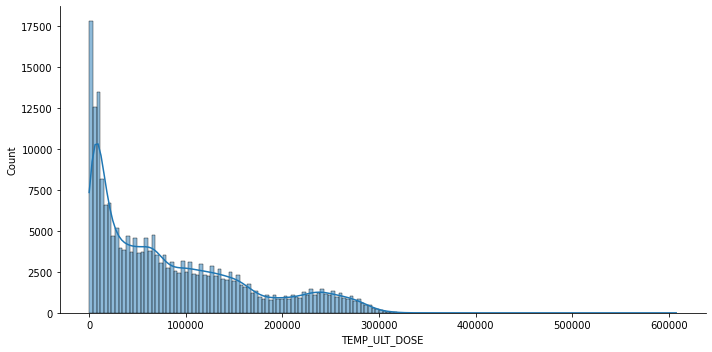

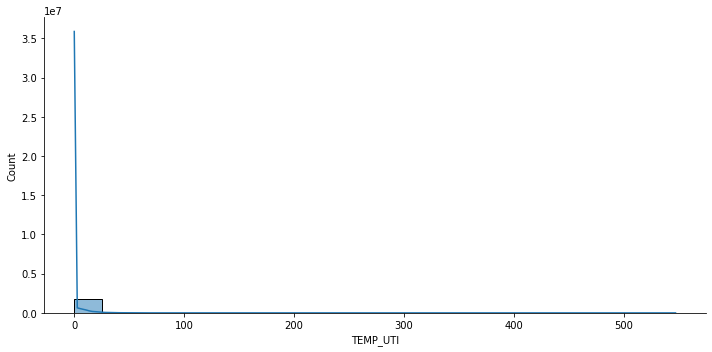

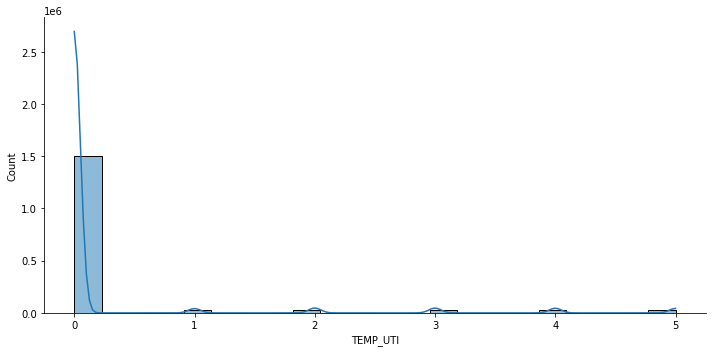

In [ ]:
sns.displot(df['TEMP_ULT_DOSE'][df['TEMP_ULT_DOSE'] < 10*maximo], kde = True,aspect = 2)
plt.show()

print()

sns.displot(df['TEMP_UTI'], kde = True,aspect = 2)
plt.show()


sns.displot(df['TEMP_UTI'][df['TEMP_UTI'] <= 5], kde = True,aspect = 2)
plt.show()

In [ ]:
df['TEMP_UTI']   = df['TEMP_UTI']/    mediaUTI
df['TEMP_ULT_DOSE'] = df['TEMP_ULT_DOSE']/mediaULTDOSE
df['NU_IDADE_N'] = df['NU_IDADE_N']/100

# Modelo

In [ ]:
df["EVOLUCAO"].value_counts()

1.0    1243269
0.0     630460
Name: EVOLUCAO, dtype: int64

## separar features e label

###Separa aproximadamente mesma quantidade para evitar esquecimento catastrófico

In [ ]:
df[df["CLASSI_FIN"] == 1]

,NU_IDADE_N,FATOR_RISC,VACINA_COV,VACINA,UTI,EVOLUCAO,CLASSI_FIN,ONDA,FATOR_RISC_GRAVE,COMORBIDADE_GRAVE,TEMP_ULT_DOSE,CLASSI_COV_EXAME,TEMP_UTI
7,0.79,1.0,0.0,0.5,0.0,0.0,1,1.0,1.0,1.0,1.128295,True,0.000000
8,0.61,1.0,0.0,0.5,0.0,1.0,1,1.0,1.0,0.5,1.128295,True,0.000000
10,0.60,1.0,0.0,0.5,1.0,0.0,1,1.0,1.0,1.0,1.128295,True,0.000000
15,0.32,0.0,0.0,0.5,0.5,1.0,1,1.0,0.5,0.5,1.128295,True,0.000000
17,0.43,0.0,0.0,0.5,1.0,1.0,1,1.0,0.5,0.5,1.128295,True,4.188665
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879939,0.72,1.0,1.0,0.5,1.0,0.0,1,5.0,1.0,1.0,0.037717,False,0.000000
1879940,0.75,1.0,1.0,0.0,0.0,1.0,1,5.0,1.0,1.0,0.013000,False,0.000000
1879941,0.63,1.0,1.0,0.5,0.0,1.0,1,5.0,1.0,1.0,0.005457,True,0.000000
1879942,0.41,0.0,1.0,0.5,0.0,1.0,1,5.0,0.5,0.5,0.019260,False,0.000000


In [ ]:
N0covid = len(df[df["CLASSI_FIN"] == 0])
df_equilibrado = (df[df["CLASSI_FIN"] == 1].sample(2*N0covid)).append(df[df["CLASSI_FIN"] == 0])

In [ ]:
features,labels = df_equilibrado.drop(columns = ["CLASSI_FIN","EVOLUCAO","TEMP_UTI"]), df_equilibrado["CLASSI_FIN"]
features_train,features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42, shuffle=True)

In [ ]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104856 entries, 1825880 to 1380769
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NU_IDADE_N         104856 non-null  float64
 1   FATOR_RISC         104856 non-null  float64
 2   VACINA_COV         104856 non-null  float64
 3   VACINA             104856 non-null  float64
 4   UTI                104856 non-null  float64
 5   ONDA               104856 non-null  float64
 6   FATOR_RISC_GRAVE   104856 non-null  float64
 7   COMORBIDADE_GRAVE  104856 non-null  float64
 8   TEMP_ULT_DOSE      104856 non-null  float64
 9   CLASSI_COV_EXAME   104856 non-null  bool   
dtypes: bool(1), float64(9)
memory usage: 8.1 MB


# Modelos de Machine Learning Utilizados 

We use two different methods to know the accuracy of our models, accuracy_score and cross_val_score, however due to the way both are implemented we will get different results, because:

They're going to be different because in cross_val_score, you obtain an accuracy for each of your folds and average them. For each CV fold, your training and tests set are different; so, you obtain different accuracy values for each of them, and it enables you to calculate standard deviation of your accuracies, which is enclosed in parentheses in your image. accuracy_score of sklearn.metrics library calculates the accuracy based on the inputs y_pred and y_true. For example, if you input your entire training set, you'll get accuracy of your entire training set, which is of course slightly different than your CV score.

In [ ]:
def getResults(x_test, y_test, model):
  predicted = model.predict(x_test)
  print("Acurácia = ", accuracy_score(y_test, predicted),"\n\n\n")
  cm = confusion_matrix(y_test, predicted)
  sns.heatmap(cm, center=True)
  plt.show()
  print(pd.DataFrame(
    confusion_matrix(y_test, predicted),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
  ))
  report = classification_report(y_test, predicted)
  print(report)

## Regressão Logistica

----------------------------------------Treino----------------------------------------

Acuracia modelo de teste, utilizando validação cruzada: 0.871004032134219
Acurácia =  0.871099412527657 





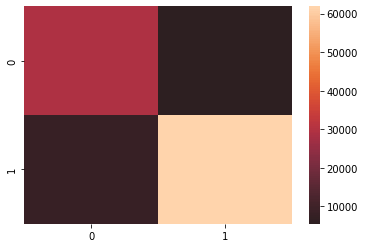

                   Predicted Not Survival  Predicted Survival
True Not Survival                   29448                5461
True Survival                        8055               61892
              precision    recall  f1-score   support

           0       0.79      0.84      0.81     34909
           1       0.92      0.88      0.90     69947

    accuracy                           0.87    104856
   macro avg       0.85      0.86      0.86    104856
weighted avg       0.87      0.87      0.87    104856

----------------------------------------Teste----------------------------------------
Acuracia modelo de treino, utilizando validação cruzada: 0.8719709849716853
Acurácia =  0.8721425914799874 





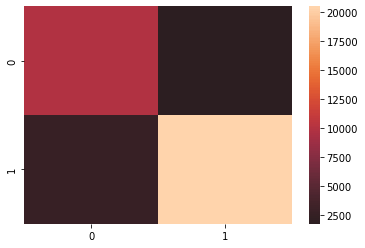

                   Predicted Not Survival  Predicted Survival
True Not Survival                    9955                1739
True Survival                        2730               20529
              precision    recall  f1-score   support

           0       0.78      0.85      0.82     11694
           1       0.92      0.88      0.90     23259

    accuracy                           0.87     34953
   macro avg       0.85      0.87      0.86     34953
weighted avg       0.88      0.87      0.87     34953



In [ ]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(features_train,labels_train)

print('-'*40 + 'Treino' + '-'*40)
print()

# Utilizando validação cruzada 
cv  = cross_val_score(lr,features_train,labels_train)
print(f'Acuracia modelo de teste, utilizando validação cruzada: {cv.mean()}')

# Método convencional 
getResults(features_train,labels_train,lr)

print('-'*40 + 'Teste' + '-'*40)

cv = cross_val_score(lr,features_test,labels_test)
print(f'Acuracia modelo de treino, utilizando validação cruzada: {cv.mean()}')

lr.fit(features_test,labels_test)

getResults(features_test,labels_test,lr)

### Importância das features

In [ ]:
importance= lr.coef_[0]
importance

array([ 4.11549425, -0.55383178,  1.02907047, -0.62267487,  0.18303874,
       -0.35950316, -0.68704706,  0.29988349,  1.21212541,  4.3020698 ])

In [ ]:
feature_names = features.columns.to_list()
feature_names[0] = 'IDADE'
feature_names[7] = 'COMORB_GRAVE'
feature_names

['IDADE',
 'FATOR_RISC',
 'VACINA_COV',
 'VACINA',
 'UTI',
 'ONDA',
 'FATOR_RISC_GRAVE',
 'COMORB_GRAVE',
 'TEMP_ULT_DOSE',
 'CLASSI_COV_EXAME']

In [ ]:
importance = list(zip(feature_names,importance))
importance.sort(key = lambda tupla: tupla[1])
importance = np.array(importance)
importance

array([['FATOR_RISC_GRAVE', '-0.687047055684572'],
       ['VACINA', '-0.6226748683343946'],
       ['FATOR_RISC', '-0.5538317787227661'],
       ['ONDA', '-0.3595031599008998'],
       ['UTI', '0.1830387449653913'],
       ['COMORB_GRAVE', '0.29988349231241207'],
       ['VACINA_COV', '1.0290704662379413'],
       ['TEMP_ULT_DOSE', '1.212125409888014'],
       ['IDADE', '4.115494249309218'],
       ['CLASSI_COV_EXAME', '4.302069804044047']], dtype='<U32')

In [ ]:
pd.DataFrame(
    {
        'variable': feature_names,
        'coefficient': lr.coef_[0]
    }
).round(2).style.bar(color = ['red','blue'], align = 'zero')


,variable,coefficient
0,IDADE,4.120000
1,FATOR_RISC,-0.550000
2,VACINA_COV,1.030000
3,VACINA,-0.620000
4,UTI,0.180000
5,ONDA,-0.360000
6,FATOR_RISC_GRAVE,-0.690000
7,COMORB_GRAVE,0.300000
8,TEMP_ULT_DOSE,1.210000
9,CLASSI_COV_EXAME,4.300000


## Árvore de Decissão 

----------------------------------------Treino----------------------------------------

Acuracia modelo de teste, utilizando validação cruzada: 0.886882975902901
Acurácia =  0.9620050354772259 





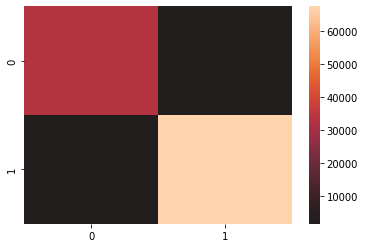

                   Predicted Not Survival  Predicted Survival
True Not Survival                   33276                1633
True Survival                        2351               67596
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     34909
           1       0.98      0.97      0.97     69947

    accuracy                           0.96    104856
   macro avg       0.96      0.96      0.96    104856
weighted avg       0.96      0.96      0.96    104856

----------------------------------------Teste----------------------------------------

Acuracia modelo de treino, utilizando validação cruzada: 0.8827282001035872
Acurácia =  0.9743083569364576 





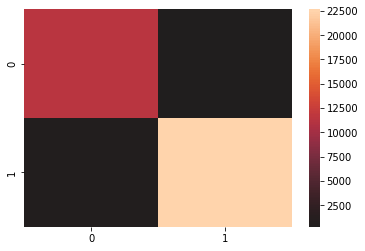

                   Predicted Not Survival  Predicted Survival
True Not Survival                   11423                 271
True Survival                         627               22632
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11694
           1       0.99      0.97      0.98     23259

    accuracy                           0.97     34953
   macro avg       0.97      0.97      0.97     34953
weighted avg       0.97      0.97      0.97     34953



In [ ]:
arvore = DecisionTreeClassifier(random_state = 1)
arvore.fit(features_train,labels_train)

print('-'*40 + 'Treino' + '-'*40)
print()

cv = cross_val_score(arvore,features_train,labels_train)
print(f'Acuracia modelo de teste, utilizando validação cruzada: {cv.mean()}')

getResults(features_train,labels_train,arvore)

print('-'*40 + 'Teste' + '-'*40)
print()

arvore.fit(features_test,labels_test)

cv = cross_val_score(arvore,features_test,labels_test)
print(f'Acuracia modelo de treino, utilizando validação cruzada: {cv.mean()}')

getResults(features_test,labels_test,arvore)


### Importância


In [ ]:
importance = np.array(
                sorted(list(
                    zip(feature_names,np.round(arvore.feature_importances_,3))
                ),key = lambda x: x[1])
            )
importance

array([['FATOR_RISC_GRAVE', '0.003'],
       ['FATOR_RISC', '0.007'],
       ['COMORB_GRAVE', '0.012'],
       ['VACINA_COV', '0.013'],
       ['UTI', '0.02'],
       ['VACINA', '0.022'],
       ['TEMP_ULT_DOSE', '0.038'],
       ['ONDA', '0.1'],
       ['IDADE', '0.198'],
       ['CLASSI_COV_EXAME', '0.587']], dtype='<U32')

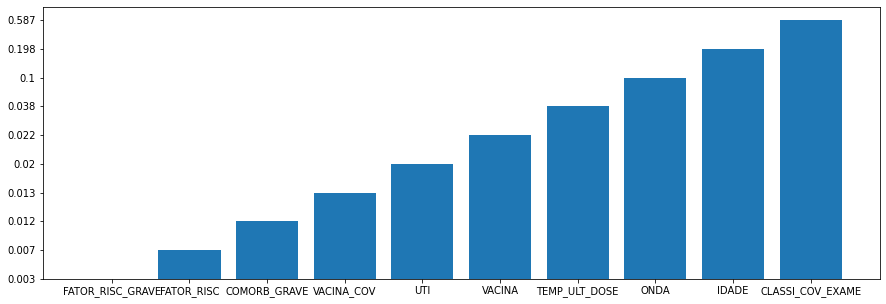

In [ ]:
plt.figure(figsize= (15,5))
plt.bar(importance[:,0],importance[:,1])

plt.show()

## Floresta Randômica

----------------------------------------Treino----------------------------------------

Acuracia modelo de teste, utilizando validação cruzada: 0.9009307995720601
Acurácia =  0.9614614328221561 





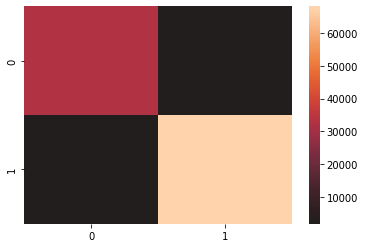

                   Predicted Not Survival  Predicted Survival
True Not Survival                   32642                2267
True Survival                        1774               68173
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     34909
           1       0.97      0.97      0.97     69947

    accuracy                           0.96    104856
   macro avg       0.96      0.95      0.96    104856
weighted avg       0.96      0.96      0.96    104856

----------------------------------------Teste----------------------------------------

Acuracia modelo de treino, utilizando validação cruzada: 0.9026979220575647
Acurácia =  0.9753383114467999 





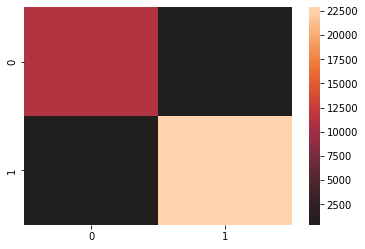

                   Predicted Not Survival  Predicted Survival
True Not Survival                   11222                 472
True Survival                         390               22869
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     11694
           1       0.98      0.98      0.98     23259

    accuracy                           0.98     34953
   macro avg       0.97      0.97      0.97     34953
weighted avg       0.98      0.98      0.98     34953



In [ ]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(features_train,labels_train)
print('-'*40 + 'Treino' + '-'*40)
print()

cv = cross_val_score(rf,features_train,labels_train)
print(f'Acuracia modelo de teste, utilizando validação cruzada: {cv.mean()}')

getResults(features_train,labels_train,rf)

print('-'*40 + 'Teste' + '-'*40)
print()

cv = cross_val_score(rf,features_test,labels_test)
print(f'Acuracia modelo de treino, utilizando validação cruzada: {cv.mean()}')

rf.fit(features_test,labels_test)

getResults(features_test,labels_test,rf)

## Kneighbor Classifier

----------------------------------------Treino----------------------------------------

Acuracia modelo de teste, utilizando validação cruzada: 0.9061951718599474
Acurácia =  0.9270046540016785 





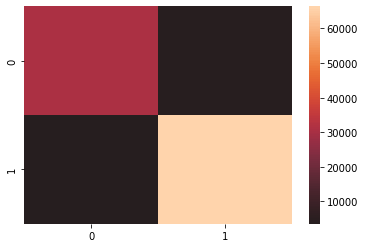

                   Predicted Not Survival  Predicted Survival
True Not Survival                   30805                4104
True Survival                        3550               66397
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     34909
           1       0.94      0.95      0.95     69947

    accuracy                           0.93    104856
   macro avg       0.92      0.92      0.92    104856
weighted avg       0.93      0.93      0.93    104856

----------------------------------------Teste----------------------------------------

Acuracia modelo de treino, utilizando validação cruzada: 0.905444330734652
Acurácia =  0.9309072182645266 





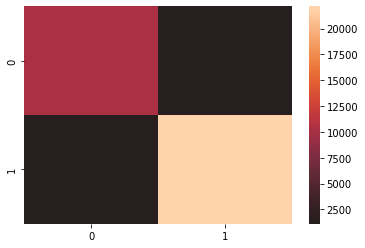

                   Predicted Not Survival  Predicted Survival
True Not Survival                   10390                1304
True Survival                        1111               22148
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     11694
           1       0.94      0.95      0.95     23259

    accuracy                           0.93     34953
   macro avg       0.92      0.92      0.92     34953
weighted avg       0.93      0.93      0.93     34953



In [ ]:
knn = KNeighborsClassifier()
knn.fit(features_train,labels_train)

print('-'*40 + 'Treino' + '-'*40)
print()

cv = cross_val_score(knn,features_train,labels_train)
print(f'Acuracia modelo de teste, utilizando validação cruzada: {cv.mean()}')

getResults(features_train,labels_train,knn)

print('-'*40 + 'Teste' + '-'*40)
print()
knn.fit(features_test,labels_test)

cv = cross_val_score(knn,features_test,labels_test)
print(f'Acuracia modelo de treino, utilizando validação cruzada: {cv.mean()}')

getResults(features_test,labels_test,knn)

## Support Vector Classification

In [ ]:
# não usar pois passa mais de 30 minutos para aferir um resultado 

#svc = SVC(probability = True)
#cv = cross_val_score(svc,features_train,labels_train,cv=5)
#print(f'Acuracia modelo de teste : {cv.mean()}')

#cv = cross_val_score(knn,features_test,labels_test)
#print(f'Acuracia modelo de treino: {cv.mean()}')

KeyboardInterrupt: ignored

## XGBClassifier

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

Acuracia modelo de teste, utilizando validação cruzada: 0.9134241201165395
Acurácia =  0.9138056000610361 





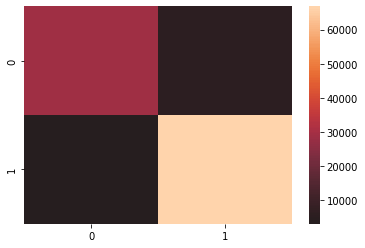

                   Predicted Not Survival  Predicted Survival
True Not Survival                   29045                5864
True Survival                        3174               66773
              precision    recall  f1-score   support

           0       0.90      0.83      0.87     34909
           1       0.92      0.95      0.94     69947

    accuracy                           0.91    104856
   macro avg       0.91      0.89      0.90    104856
weighted avg       0.91      0.91      0.91    104856



In [ ]:
xgb = XGBClassifier(random_state =1)
xgb.fit(features_train,labels_train)
cv = cross_val_score(xgb,features_train,labels_train,cv=5)
print(f'Acuracia modelo de teste, utilizando validação cruzada: {cv.mean()}')
getResults(features_train,labels_train,xgb)